# Import Dataset

Data Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocess  Data

## 1. Define Indep & Dep

In [3]:
x = df.iloc[:,1:-1]
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [4]:
y = df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

## Deal with Missing Data

In [5]:
x.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

In [6]:
y.isna().sum()

0

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
si = SimpleImputer(missing_values=np.nan, strategy="mean")

In [9]:
x[["bmi"]] = si.fit_transform(x[["bmi"]])
x.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

## Encoding Indep & Dep

In [10]:
x["ever_married"] = x["ever_married"].map({"Yes": 1, "No": 0})

In [11]:
x = pd.get_dummies(x, dtype=int)
x

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.600000,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,1,202.21,28.893237,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,1,105.92,32.500000,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,171.23,34.400000,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,28.893237,1,0,0,0,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,1,125.20,40.000000,1,0,0,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,1,82.99,30.600000,1,0,0,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,1,166.29,25.600000,0,1,0,0,0,1,0,0,1,0,0,1,0,0


## Train/Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [15]:
x_train[["age","avg_glucose_level","bmi"]] = ss.fit_transform(x_train[["age","avg_glucose_level","bmi"]])

In [16]:
x_train

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3029,-0.328243,0,0,1,-0.860231,0.995134,1,0,0,0,0,1,0,0,1,0,0,1,0,0
2277,-0.416494,0,0,1,-0.501703,2.501520,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3002,0.730767,0,0,1,-0.907255,0.241941,0,1,0,0,0,1,0,0,1,0,0,0,1,0
246,1.392648,0,0,1,-0.606126,0.050451,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2825,1.436774,0,0,1,-1.050975,-0.421890,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.421889,1,0,1,-0.168783,1.263220,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3264,0.774893,0,0,1,-0.756028,-0.370826,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1653,0.024760,0,0,1,-0.254883,-0.064443,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2607,-0.990124,0,0,0,0.324193,0.101515,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [17]:
x_test[["age","avg_glucose_level","bmi"]] = ss.transform(x_test[["age","avg_glucose_level","bmi"]])

In [18]:
x_test

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
42,1.701526,0,1,1,0.853155,-0.319762,0,1,0,0,0,1,0,0,0,1,0,0,0,1
380,-1.740257,0,0,0,-0.000778,-1.558063,0,1,0,0,0,0,0,1,1,0,1,0,0,0
3524,0.642516,0,0,1,-0.580738,-0.383592,0,1,0,0,0,1,0,0,0,1,0,0,1,0
352,-1.034250,0,0,0,-0.213820,0.663219,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4927,-1.475504,0,0,0,-0.803935,-1.941042,1,0,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,-0.019365,0,0,1,-0.688914,-0.766572,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4446,-0.063491,0,0,1,1.891651,-0.128272,1,0,0,0,0,1,0,0,0,1,0,0,1,0
660,0.377764,0,0,0,-0.814311,0.931304,0,1,0,0,0,1,0,0,1,0,1,0,0,0
57,1.525025,0,0,1,2.902992,-0.001476,0,1,0,0,0,1,0,0,0,1,0,1,0,0


# Model Building

## Regression Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
results_l = LinearRegression()

In [21]:
results_l.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred_l = results_l.predict(x_test)

In [23]:
results_l.score(x_train,y_train)

0.08672491214453437

## Classification Model

In [24]:
from sklearn.svm import SVC

In [25]:
results_c = SVC(kernel="rbf", random_state=0)
results_c.fit(x_train,y_train)

SVC(random_state=0)

In [26]:
y_pred_c = results_c.predict(x_test)

In [27]:
from sklearn.metrics import *

<Axes: >

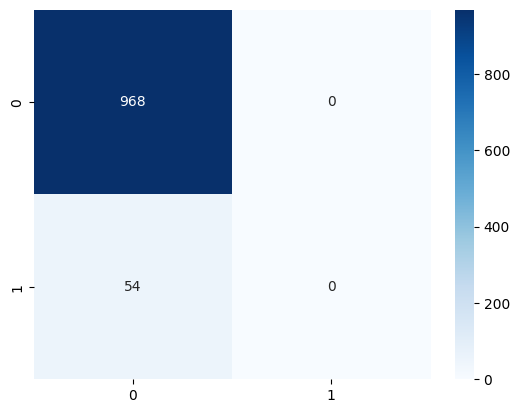

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred_c), annot=True, cmap="Blues", fmt="d")

In [29]:
accuracy_score(y_test,y_pred_c)

0.9471624266144814

In [30]:
recall_score(y_test,y_pred_c)

0.0

In [31]:
precision_score(y_test,y_pred_c)

/home/kic-admin/jupyter_notebook_project/jupyter_notebook_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [32]:
f1_score(y_test,y_pred_c)

0.0

# Applying Grid-Search

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = [{"C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"kernel":["linear"]},
             {"C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"kernel":["rbf"],"gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator=results_c, param_grid=parameters, scoring="accuracy")

In [35]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(random_state=0),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'kernel': ['linear']},
                         {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [36]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9522993957857627

In [37]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 0.1, 'kernel': 'linear'}

In [38]:
parameters = [{"C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"kernel":["linear"]},
             {"C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"kernel":["rbf"],"gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator=results_c, param_grid=parameters, scoring="recall")

In [39]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(random_state=0),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'kernel': ['linear']},
                         {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='recall')

In [40]:
best_recall = grid_search.best_score_
best_recall

0.0

In [41]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 0.1, 'kernel': 'linear'}

# Cat Boost Attempt

In [42]:
from catboost import CatBoostClassifier

In [43]:
results_cb = CatBoostClassifier()

In [44]:
results_cb.fit(x_train,y_train)

Learning rate set to 0.018795
0:	learn: 0.6621923	total: 48.4ms	remaining: 48.4s
1:	learn: 0.6322957	total: 50.1ms	remaining: 25s
2:	learn: 0.6045649	total: 51.7ms	remaining: 17.2s
3:	learn: 0.5772435	total: 53.3ms	remaining: 13.3s
4:	learn: 0.5577579	total: 54.4ms	remaining: 10.8s
5:	learn: 0.5371466	total: 56.1ms	remaining: 9.29s
6:	learn: 0.5149112	total: 57.7ms	remaining: 8.19s
7:	learn: 0.4929160	total: 59.4ms	remaining: 7.36s
8:	learn: 0.4768326	total: 61ms	remaining: 6.72s
9:	learn: 0.4615596	total: 62.6ms	remaining: 6.2s
10:	learn: 0.4461661	total: 64.3ms	remaining: 5.78s
11:	learn: 0.4317785	total: 66ms	remaining: 5.43s
12:	learn: 0.4178032	total: 67.7ms	remaining: 5.14s
13:	learn: 0.4049330	total: 69.4ms	remaining: 4.89s
14:	learn: 0.3937789	total: 70.5ms	remaining: 4.63s
15:	learn: 0.3799919	total: 72.2ms	remaining: 4.44s
16:	learn: 0.3657594	total: 73.7ms	remaining: 4.26s
17:	learn: 0.3534351	total: 75.1ms	remaining: 4.1s
18:	learn: 0.3403819	total: 76.6ms	remaining: 3.95s


In [45]:
y_pred_cb = results_cb.predict(x_test)

<Axes: >

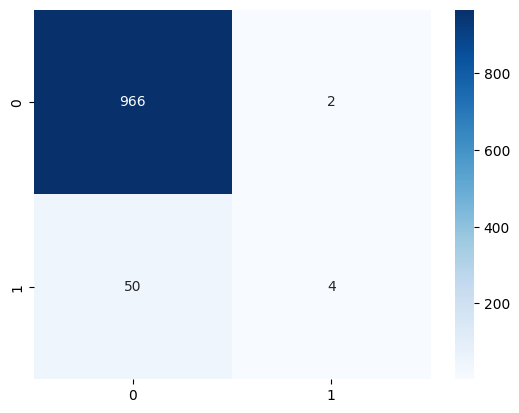

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred_cb), annot=True, cmap="Blues", fmt="d")

In [47]:
accuracy_score(y_test,y_pred_cb)

0.949119373776908

In [48]:
recall_score(y_test,y_pred_cb)

0.07407407407407407

In [49]:
precision_score(y_test,y_pred_cb)

0.6666666666666666

In [50]:
f1_score(y_test,y_pred_cb)

0.13333333333333333

# XGBoost Attempt

In [51]:
from xgboost import XGBClassifier

In [52]:
results_xg = XGBClassifier()

In [53]:
results_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
y_pred_xg = results_xg.predict(x_test)

<Axes: >

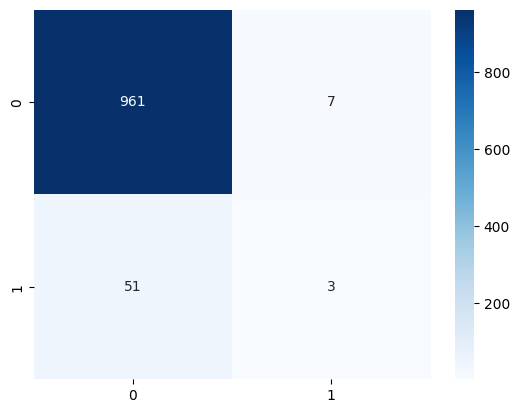

In [55]:
sns.heatmap(confusion_matrix(y_test,y_pred_xg), annot=True, cmap="Blues", fmt="d")

In [56]:
accuracy_score(y_test,y_pred_xg)

0.9432485322896281

In [57]:
recall_score(y_test,y_pred_xg)

0.05555555555555555

In [58]:
precision_score(y_test,y_pred_xg)

0.3

In [59]:
f1_score(y_test,y_pred_xg)

0.09375000000000001